In [1]:
# google driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# sys.pathの設定
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2_shakyo')  # multi_layer_net

optimizer     
SGD

Generation: 10.正答率（train) = 0.11
             :10.正答率(test) =0.1703
Generation: 20.正答率（train) = 0.21
             :20.正答率(test) =0.2262
Generation: 30.正答率（train) = 0.25
             :30.正答率(test) =0.2819
Generation: 40.正答率（train) = 0.32
             :40.正答率(test) =0.3416
Generation: 50.正答率（train) = 0.31
             :50.正答率(test) =0.389
Generation: 60.正答率（train) = 0.46
             :60.正答率(test) =0.4217
Generation: 70.正答率（train) = 0.41
             :70.正答率(test) =0.4567
Generation: 80.正答率（train) = 0.56
             :80.正答率(test) =0.4767
Generation: 90.正答率（train) = 0.47
             :90.正答率(test) =0.4907
Generation: 100.正答率（train) = 0.57
             :100.正答率(test) =0.5146
Generation: 110.正答率（train) = 0.57
             :110.正答率(test) =0.5361
Generation: 120.正答率（train) = 0.49
             :120.正答率(test) =0.5561
Generation: 130.正答率（train) = 0.58
             :130.正答率(test) =0.5709
Generation: 140.正答率（train) = 0.59
             :140.正答率(test) =0.593
Generation: 150.正答率（train) = 0.55
      

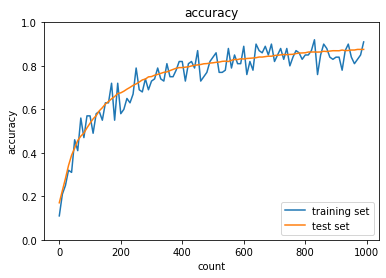

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# batch_normalizationの適用
use_batchnorm = False

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
    network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


Momentum

Generation: 10.正答率（train) = 0.22
             :10.正答率(test) =0.2148
Generation: 20.正答率（train) = 0.53
             :20.正答率(test) =0.4287
Generation: 30.正答率（train) = 0.55
             :30.正答率(test) =0.4967
Generation: 40.正答率（train) = 0.66
             :40.正答率(test) =0.6197
Generation: 50.正答率（train) = 0.71
             :50.正答率(test) =0.6892
Generation: 60.正答率（train) = 0.7
             :60.正答率(test) =0.7328
Generation: 70.正答率（train) = 0.75
             :70.正答率(test) =0.7808
Generation: 80.正答率（train) = 0.81
             :80.正答率(test) =0.8045
Generation: 90.正答率（train) = 0.76
             :90.正答率(test) =0.8117
Generation: 100.正答率（train) = 0.81
             :100.正答率(test) =0.8356
Generation: 110.正答率（train) = 0.87
             :110.正答率(test) =0.8399
Generation: 120.正答率（train) = 0.84
             :120.正答率(test) =0.8478
Generation: 130.正答率（train) = 0.83
             :130.正答率(test) =0.8542
Generation: 140.正答率（train) = 0.89
             :140.正答率(test) =0.8608
Generation: 150.正答率（train) = 0.92
     

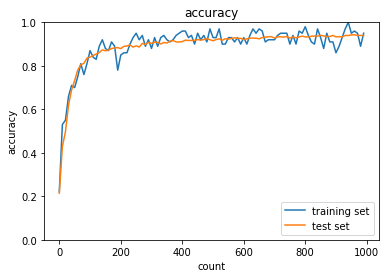

In [18]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# batch_normalizationの適用
use_batchnorm = False

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  if i == 0:
    v = {}
  for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
    if i == 0:
      v[key] = np.zeros_like(network.params[key])
    # momentum
    v[key] = momentum * v[key] - learning_rate * grad[key]
    network.params[key] += v[key]

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


MomentumをもとにAdaGradを作る

Generation: 10.正答率（train) = 0.75
             :10.正答率(test) =0.7108
Generation: 20.正答率（train) = 0.82
             :20.正答率(test) =0.7718
Generation: 30.正答率（train) = 0.93
             :30.正答率(test) =0.8509
Generation: 40.正答率（train) = 0.89
             :40.正答率(test) =0.8527
Generation: 50.正答率（train) = 0.88
             :50.正答率(test) =0.8738
Generation: 60.正答率（train) = 0.87
             :60.正答率(test) =0.8779
Generation: 70.正答率（train) = 0.92
             :70.正答率(test) =0.8799
Generation: 80.正答率（train) = 0.92
             :80.正答率(test) =0.8807
Generation: 90.正答率（train) = 0.9
             :90.正答率(test) =0.8789
Generation: 100.正答率（train) = 0.9
             :100.正答率(test) =0.887
Generation: 110.正答率（train) = 0.92
             :110.正答率(test) =0.8941
Generation: 120.正答率（train) = 0.91
             :120.正答率(test) =0.9007
Generation: 130.正答率（train) = 0.92
             :130.正答率(test) =0.9021
Generation: 140.正答率（train) = 0.88
             :140.正答率(test) =0.9046
Generation: 150.正答率（train) = 0.92
       

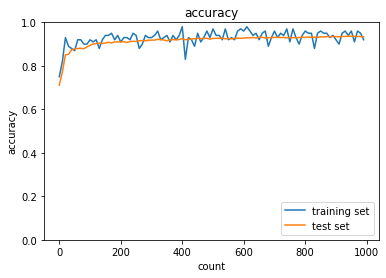

In [19]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# batch_normalizationの適用
use_batchnorm = False

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9
θ = 1e-4

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  if i == 0:
    h = {}
  for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
    if i == 0:
      h[key] = np.zeros_like(network.params[key])
    # AdaGrad
    h[key] += grad[key] * grad[key]  # 学習率の減算値
    # 現在の重みを、減算させた学習率で更新
    network.params[key] -= grad[key] * learning_rate / (np.sqrt(h[key]) + θ)


    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

RMSProp

Generation: 10.正答率（train) = 0.28
             :10.正答率(test) =0.2534
Generation: 20.正答率（train) = 0.56
             :20.正答率(test) =0.5758
Generation: 30.正答率（train) = 0.84
             :30.正答率(test) =0.7047
Generation: 40.正答率（train) = 0.81
             :40.正答率(test) =0.7783
Generation: 50.正答率（train) = 0.83
             :50.正答率(test) =0.816
Generation: 60.正答率（train) = 0.9
             :60.正答率(test) =0.8473
Generation: 70.正答率（train) = 0.96
             :70.正答率(test) =0.8396
Generation: 80.正答率（train) = 0.89
             :80.正答率(test) =0.8586
Generation: 90.正答率（train) = 0.94
             :90.正答率(test) =0.8815
Generation: 100.正答率（train) = 0.91
             :100.正答率(test) =0.8869
Generation: 110.正答率（train) = 0.94
             :110.正答率(test) =0.8351
Generation: 120.正答率（train) = 0.95
             :120.正答率(test) =0.8964
Generation: 130.正答率（train) = 0.95
             :130.正答率(test) =0.9004
Generation: 140.正答率（train) = 0.95
             :140.正答率(test) =0.9005
Generation: 150.正答率（train) = 0.95
      

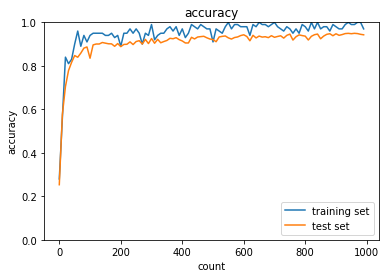

In [20]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# batch_normalizationの適用
use_batchnorm = False

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99
θ = 1e-4

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  if i == 0:
    h = {}
  for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
    if i == 0:
      h[key] = np.zeros_like(network.params[key])
    # RMSProp
    h[key] *= decay_rate
    h[key] += (1 - decay_rate) * np.square(grad[key])  # 学習率の減算値
    # 現在の重みを、減算させた学習率で更新
    network.params[key] -= grad[key] * learning_rate / (np.sqrt(h[key]) + θ)


    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

Adam

Generation: 10.正答率（train) = 0.53
             :10.正答率(test) =0.4758
Generation: 20.正答率（train) = 0.74
             :20.正答率(test) =0.7356
Generation: 30.正答率（train) = 0.82
             :30.正答率(test) =0.7858
Generation: 40.正答率（train) = 0.77
             :40.正答率(test) =0.8178
Generation: 50.正答率（train) = 0.89
             :50.正答率(test) =0.8327
Generation: 60.正答率（train) = 0.92
             :60.正答率(test) =0.857
Generation: 70.正答率（train) = 0.84
             :70.正答率(test) =0.8533
Generation: 80.正答率（train) = 0.88
             :80.正答率(test) =0.8665
Generation: 90.正答率（train) = 0.89
             :90.正答率(test) =0.8714
Generation: 100.正答率（train) = 0.83
             :100.正答率(test) =0.8741
Generation: 110.正答率（train) = 0.94
             :110.正答率(test) =0.8914
Generation: 120.正答率（train) = 0.94
             :120.正答率(test) =0.8928
Generation: 130.正答率（train) = 0.86
             :130.正答率(test) =0.8992
Generation: 140.正答率（train) = 0.89
             :140.正答率(test) =0.8942
Generation: 150.正答率（train) = 0.87
     

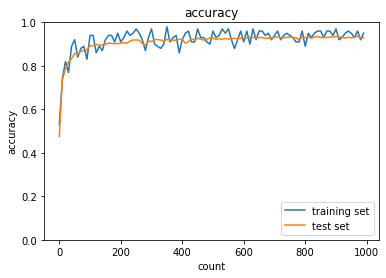

In [21]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# batch_normalizationの適用
use_batchnorm = False

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
θ = 1e-4

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval = 10

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  d_batch = d_train[batch_mask]

  # 勾配
  grad = network.gradient(x_batch, d_batch)
  if i == 0:
    m = {}
    v = {}
  for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
    if i == 0:
      m[key] = np.zeros_like(network.params[key])
      v[key] = np.zeros_like(network.params[key])
    # Adam
    m[key] += (1 - beta1) * (grad[key] - m[key])
    v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])
    network.params[key] -= learning_rate * m[key] / (np.sqrt(v[key]) + θ)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)


  if (i + 1) % plot_interval == 0:
    accr_test = network.accuracy(x_test, d_test)
    accuracies_test.append(accr_test)
    accr_train = network.accuracy(x_batch, d_batch)
    accuracies_train.append(accr_train)

    print('Generation: '+ str(i+1) + '.正答率（train) = ' + str(accr_train))
    print('             :' + str(i+1) + '.正答率(test) =' + str(accr_test))

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label='training set')
plt.plot(lists, accuracies_test, label='test set')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('count')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
# グラフの表示
plt.show()